# The Spark Foundation

# Data Science & Business Analytics Internship

# Intern: Sachin Gupta

# Task 2: Prediction using Unsupervised ML

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline

In [34]:
data=pd.read_csv("./iris.csv")
print(data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [35]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Finding the optimum number of clusters

In [36]:
X = data.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print('k:',i ,"wcss: ",kmeans.inertia_)

k: 1 wcss:  281831.54466666654
k: 2 wcss:  70581.3808
k: 3 wcss:  31320.711199999994
k: 4 wcss:  17758.792503556186
k: 5 wcss:  11468.968747023802
k: 6 wcss:  7921.863473076923
k: 7 wcss:  5911.632365518538
k: 8 wcss:  4541.979023391812
k: 9 wcss:  3571.911095588236
k: 10 wcss:  2943.9331008403374


# Plotting the results and observe The elbow

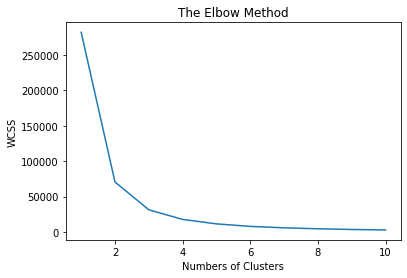

In [37]:
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Numbers of Clusters")
plt.ylabel("WCSS")
plt.show()

# Applying KMeans and Predicted values

In [38]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Visualising the clusters and Plotting the centroids of the clusters

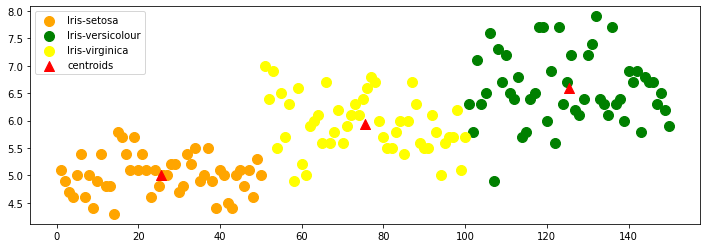

In [39]:
plt.figure(figsize=(12,4))
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c='orange',label='Iris-setosa')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c='green',label='Iris-versicolour')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c='yellow',label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red', label='centroids', marker="^")
plt.legend()